In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow

### Leer archivos parquet

In [2]:
b_az=pd.read_parquet('business3estados.parquet')
ch=pd.read_parquet('checkin3estados.parquet')
tip=pd.read_parquet('tip3estados.parquet')
usr=pd.read_parquet('user3estados.parquet')
r_az=pd.read_parquet('REV_AZ.parquet')
r_ca=pd.read_parquet('REV_CA.parquet')
r_fl=pd.read_parquet('REV_FL.parquet')

### Ver Dimenciones de Los Dataframes

Analisis: Se ven las dimenciones de los Datasets y se llega a la conclusion de que hay tablas Principales y otras que son dependientes osea que todas tienen valor en su conjunto y dificilmente mas no imposible puede resultar dificil de extraer informacion de una tabla por si sola

Por el numero de registos se ve que es un dataset con una buena cantidad de conocimento real ya que en las ciudades que nos dedicamos en este proyecto son ciudades grandes, por varios analisis se ve que aunque no esta completo tampoco esta demaciado alejado de la realidad.

Me atreveria decir que esta en un punto medio de Exactitud

In [3]:
b_az.shape

(41444, 14)

In [4]:
ch.shape

(36401, 2)

In [5]:
tip.shape

(251444, 4)

In [6]:
usr.shape

(397785, 9)

In [7]:
r_az.shape

(151881, 17)

In [8]:
r_ca.shape

(119392, 11)

In [9]:
r_fl.shape

(460601, 17)

### Ver Datos Nulos

Analisis: Aqui se puede ver el valor de las columnas por la cantidad de datos rellenados y los datos vacios, principalmente se ve donde podriamos tener menos margen de error al momento de utilizar una columna.

In [10]:
b_az.isnull().sum()

business_id        0
name               0
address            0
city               0
state              0
postal_code        0
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes      3862
categories        25
hours           6506
dtype: int64

In [11]:
ch.isnull().sum()

business_id    0
date           0
dtype: int64

In [12]:
tip.isnull().sum()

business_id         0
user_id             0
text                0
compliment_count    0
dtype: int64

In [13]:
usr.isnull().sum()

user_id           0
name              0
review_count      0
useful            0
funny             0
cool              0
fans              0
average_stars     0
compliment_hot    0
dtype: int64

In [14]:
r_az.isnull().sum()

business_id                    0
name                           0
address                      393
city                           0
postal_code                    0
latitude                       0
longitude                      0
stars_x                        0
review_count                   0
user_id                        0
stars_y                        0
useful                         0
funny                          0
cool                           0
date                           0
Polaridad del sentimiento      0
Sentimiento                    0
dtype: int64

In [15]:
r_ca.isnull().sum()

user_id                      0
business_id                  0
stars                        0
useful                       0
funny                        0
cool                         0
date                         0
Polaridad del sentimiento    0
Sentimiento                  0
ano                          0
mes                          0
dtype: int64

In [16]:
r_fl.isnull().sum()

business_id                    0
name                           0
address                      400
city                           0
postal_code                    0
latitude                       0
longitude                      0
stars_x                        0
review_count                   0
user_id                        0
stars_y                        0
useful                         0
funny                          0
cool                           0
date                           0
Polaridad del sentimiento      0
Sentimiento                    0
dtype: int64

### Datos duplicados

Conclusion: Hay datos duplicados en los dataframes, no se especifico, ya que no es del todo reelevante ya que existen muchos negocios del mismo tipo en una ciudad o hay varios comentarios de la misma persona. 

Asi que en caso de que se tenga alguna duda se buscarian duplicados o filtrarian cosas de ciertos registros en la tabla

In [17]:
r_az.duplicated().count()

151881

In [18]:
r_ca.duplicated().count()

119392

In [19]:
r_fl.duplicated().count()

460601

In [20]:
ch.duplicated().count()

36401

In [21]:
tip.duplicated().count()

251444

In [22]:
usr.duplicated().sum()

277624

### Datos similares

conclusion: Para este analisis se tomaron 2 datasets y se filtraron las columnas de interes

Solo se hicieron 2 analisis ya que interesa saber el numero de negocios duplicados que existen y al parecer no son pocos al igual que de usuarios duplicados

In [23]:
business=b_az['business_id'].unique()
business.shape

(41444,)

In [24]:
usr1=usr['user_id'].unique()
usr1.shape

(120161,)

#### Datos Datos restaurantes mas reelevantes de las tablas

analisis: En esta tabla se puede ver los restaurantes con mas estrellas y 2 de ellos sonde AZ y 1 de el es de AZ, segun como lo clasifico la computadora, en caso que se realize un merge con otra tabla se podrian ver la cantidad de comentarios y de personas que puntuan el restaurant.

Asi agregando mas variables se podria conseguir una mayor presicion conforme que restaurante de 5 estellas es el mejor

In [31]:
business=b_az[['business_id', 'stars', 'state']].sort_values(by='stars', ascending=False).head(15)
business

,business_id,stars,state
35511,swmPCRi7bOu6ATAThAXYGw,5.0,AZ
46822,GioQY5rE_tDfeDItgKJDKw,5.0,AZ
137038,9VTCalrSzAyVDcf-6gDIZw,5.0,FL
137071,OmV3ZeEC2Yr7Dt4XD7gyPw,5.0,FL
105986,Sv8CMETkwVHjmoQXWGnROA,5.0,CA
30131,SmNi3xGxiHGUUNtSpudsLw,5.0,FL
103445,veJSiFzg4wUQbC3LK1tuPA,5.0,AZ
131468,qRr9ILdWroRM0v1utwAmrw,5.0,FL
106168,mOkO1JFFw2Iskgg30mJABA,5.0,CA
104170,NlhEXGsDDpMdqZ6APCs8_w,5.0,FL


/var/folders/w5/r6_nbnhj29l7td33bhmpmz180000gn/T/ipykernel_7333/2116015919.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=business, x="business_id", y="stars", kind="bar", palette="colorblind")


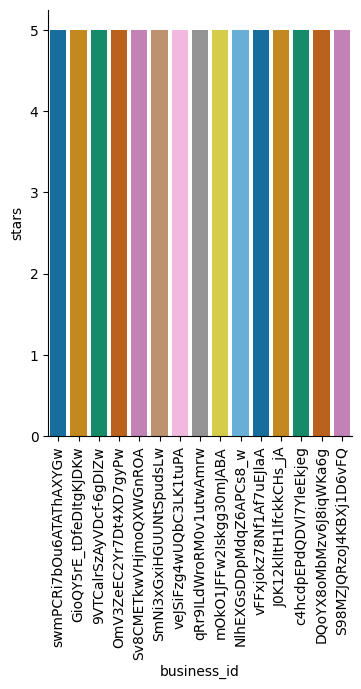

In [33]:
sns.catplot(data=business, x="business_id", y="stars", kind="bar", palette="colorblind")
plt.xticks(rotation=90)
plt.show()

analisis: Ahora los restaurantes estan ordenados segun la cantidad de comentarios, con esto podemos ver la cantidad de visitas e interacciones que tienen con sus clientes, o pueden ser que sean mas populares ya que se tomaron el tiempo para valorarlo osea que no pasaron de largo

In [27]:
baz2=b_az[['business_id', 'review_count']].sort_values(by='review_count',ascending=False).head(15)
baz2

,business_id,review_count
113731,_ab50qdWOk0DdB6XOrBitw,7568
112552,ac1AeYqs8Z4_e2X5M3if2A,7400
147081,oBNrLz4EDhiscSlbOl8uAw,5193
129349,yPSejq3_erxo9zdVYTBnZA,3834
147858,VAeEXLbEcI9Emt9KGYq9aA,3054
120871,ww3YJXu5c18aGZXWmm00qg,2756
53452,sTPueJEwcRDj7ZJmG7okYA,2736
36746,RQAF6a0akMiot5lZZnMNNw,2686
114618,J0joPXxmN-_9Lzafspqdbw,2506
9506,PY9GRfzr4nTZeINf346QOw,2486


/var/folders/w5/r6_nbnhj29l7td33bhmpmz180000gn/T/ipykernel_7333/3111464161.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=baz2, x="business_id", y="review_count", kind="bar", palette="colorblind")


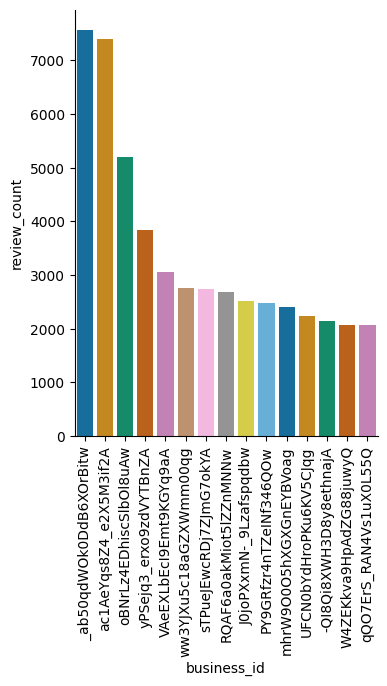

In [28]:
sns.catplot(data=baz2, x="business_id", y="review_count", kind="bar", palette="colorblind")
plt.xticks(rotation=90)
plt.show()

#### Usuario con mas comentarios

analisis: aqui se ve el nivel de empatia de los usuarios ya que se toman el tiempo para puntuar los restaurantes esto normalmente lo hacen por beneficio de los demas

Si se llega a hacer un merge de estos usuarios con sus comentarios y despues con las empresas podriamos descubrir mediante el analisis de sentimiento con exactitud que Usuarios realmente les interesa la aplicacion de Yelp y aprender de ellos, Porque.

In [29]:
usr3=usr[['user_id', 'review_count']].sort_values(by='review_count', ascending=False).head(15)
usr3

,user_id,review_count
285325,Hi10sGSZNxQH3NLyWSZ1oA,17473
118043,Hi10sGSZNxQH3NLyWSZ1oA,17473
196014,Hi10sGSZNxQH3NLyWSZ1oA,17473
166651,Hi10sGSZNxQH3NLyWSZ1oA,17473
346870,hWDybu_KvYLSdEFzGrniTw,16567
346871,hWDybu_KvYLSdEFzGrniTw,16567
346872,hWDybu_KvYLSdEFzGrniTw,16567
364599,8RcEwGrFIgkt9WQ35E6SnQ,7738
243798,8RcEwGrFIgkt9WQ35E6SnQ,7738
150319,8RcEwGrFIgkt9WQ35E6SnQ,7738


analisis de la grafica: La grafica solo muestra los primeros 15 y como se encuentran duplicados solo aparecen 3 usuarios aun asi el analisis es correcto, pero los datos muestran que pudieron ser generados ya que hay similitudes muy peculiares en los datos, agruparlos y hacerlos parecer una suma creo que no seria considerado un analisis de datos por eso lo dejo asi.

/var/folders/w5/r6_nbnhj29l7td33bhmpmz180000gn/T/ipykernel_7333/4185709009.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=usr3, x="user_id", y="review_count", kind="bar", palette="plasma")


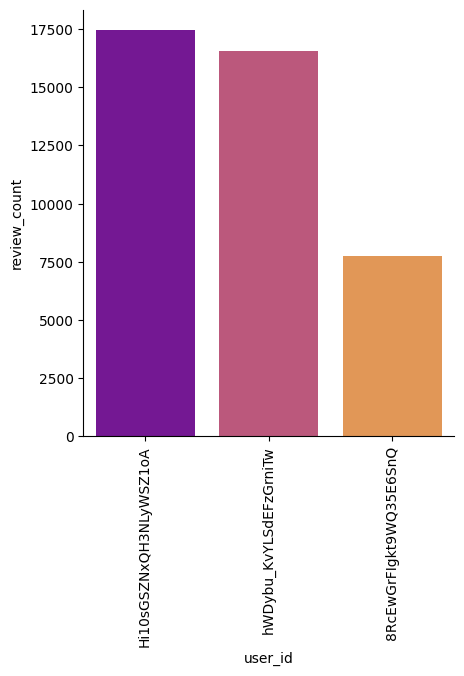

In [30]:
sns.catplot(data=usr3, x="user_id", y="review_count", kind="bar", palette="plasma")
plt.xticks(rotation=90)
plt.show()

# Que se realizo en este EDA:

 Como analisis exploratorio de los datos, creo que es suficiente para conocer los datos a trabajar y que se puede 
 hacer con ellos, tambien que informacion es importante y que otra podria solo tener valor si se llega a hacer merges 'uniones', entre las 
 tablas pero como no es un trabajo de transformacion me abstube de hacer esto ultimo y solo me dedique a analizar en lo que se iba a trabajar en este proyecto 